In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**READING FILES**

In [2]:
clevelandhd <- read_csv("data/heart_disease/processed.cleveland.data", col_names = FALSE)
clevelandhd

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


**CLEAN AND WRANGLING DATA**

In [3]:
clevelandhd <- clevelandhd|>
    rename(age = X1,
           sex = X2,
           cp = X3,
           trestbps = X4,
           chol = X5,
           fbs = X6,
           restecg = X7,
           thalach = X8,
           exang = X9,
           oldpeak = X10,
           slope = X11,
           ca = X12,
           thal = X13,
           num = X14) |>
    select(trestbps, chol, thalach, oldpeak, num) |>
    mutate(num = as.factor(num)) |>
    mutate(num = fct_recode(num, "Yes" = "0", "No" = "1", "No" = "2", "No" = "3", "No" = "4"))
clevelandhd

trestbps,chol,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,233,150,2.3,Yes
160,286,108,1.5,No
120,229,129,2.6,No
130,250,187,3.5,Yes
130,204,172,1.4,Yes
120,236,178,0.8,Yes
140,268,160,3.6,No
120,354,163,0.6,Yes
130,254,147,1.4,No


**SPLITING DATA**

In [4]:
clevelandhd_split <- initial_split(clevelandhd, prop = 0.75, strata = num)
clevelandhd_training <- training(clevelandhd_split)
clevelandhd_testing <- testing(clevelandhd_split)

In [5]:
glimpse(clevelandhd_training)

Rows: 227
Columns: 5
$ trestbps <dbl> 160, 120, 140, 130, 140, 130, 110, 132, 130, 110, 117, 140, 1…
$ chol     <dbl> 286, 229, 268, 254, 203, 256, 229, 224, 206, 167, 230, 335, 1…
$ thalach  <dbl> 108, 129, 160, 147, 155, 142, 168, 173, 132, 114, 160, 158, 1…
$ oldpeak  <dbl> 1.5, 2.6, 3.6, 1.4, 3.1, 0.6, 1.0, 3.2, 2.4, 2.0, 1.4, 0.0, 2…
$ num      <fct> No, No, No, No, No, No, No, No, No, No, No, No, No, No, No, N…


In [6]:
glimpse(clevelandhd_testing)

Rows: 76
Columns: 5
$ trestbps <dbl> 120, 120, 120, 150, 135, 140, 110, 130, 112, 130, 125, 125, 1…
$ chol     <dbl> 236, 284, 340, 247, 234, 199, 175, 197, 290, 253, 273, 213, 3…
$ thalach  <dbl> 178, 160, 172, 171, 161, 178, 123, 152, 153, 144, 152, 125, 1…
$ oldpeak  <dbl> 0.8, 1.8, 0.0, 1.5, 0.5, 1.4, 0.6, 1.2, 0.0, 1.4, 0.5, 1.4, 0…
$ num      <fct> Yes, No, Yes, Yes, Yes, Yes, Yes, Yes, No, No, Yes, Yes, Yes,…


In [7]:
hd_proportions <- clevelandhd_training |>
    group_by(num) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(clevelandhd_training))
hd_proportions

num,n,percent
<fct>,<int>,<dbl>
Yes,123,54.18502
No,104,45.81498


In [8]:
clevelandhd_training

trestbps,chol,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
160,286,108,1.5,No
120,229,129,2.6,No
140,268,160,3.6,No
130,254,147,1.4,No
140,203,155,3.1,No
130,256,142,0.6,No
110,229,168,1.0,No
132,224,173,3.2,No
130,206,132,2.4,No


**VISUALIZATION TO FIND K**

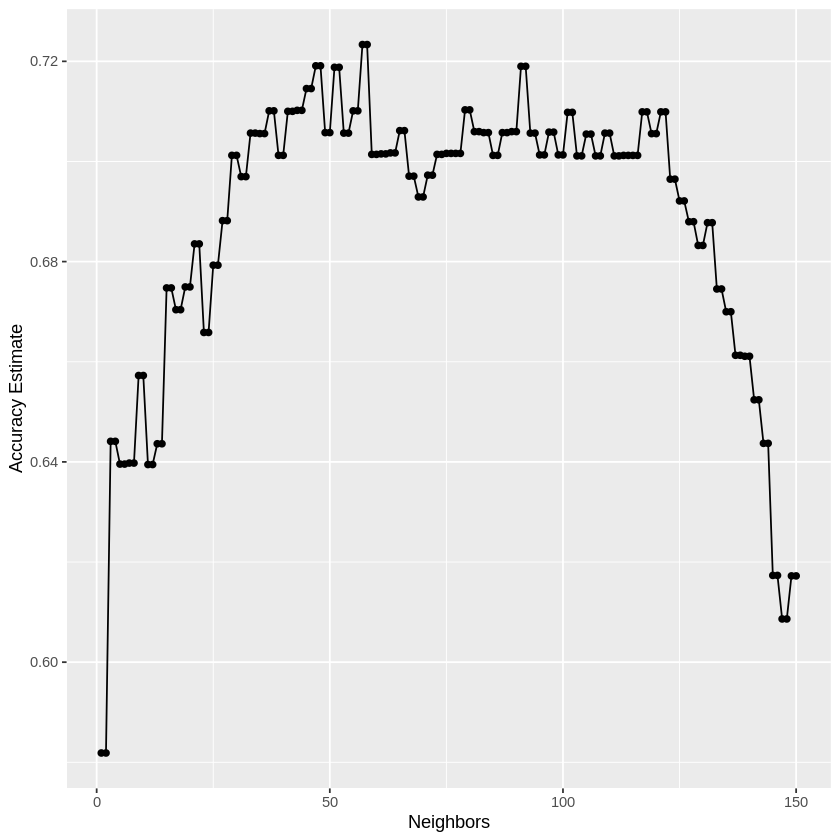

In [20]:
clevelandhd_recipe <- recipe(num ~ trestbps + chol + thalach + oldpeak, data = clevelandhd_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

clevelandhd_vfold <- vfold_cv(clevelandhd_training, v = 5, strata = num)

k_vals <- tibble(neighbors = seq(from = 1, to = 150))

clevelandhd_tuning_result <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = clevelandhd_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- clevelandhd_tuning_result |>
    filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                             geom_point() +
                             geom_line() +
                             labs(x = "Neighbors", y = "Accuracy Estimate") +
                             xlim(c(neighbors("50"),(neighbors("75")))
accuracy_vs_k

Warning message:
“Removed 129 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 129 rows containing missing values or values outside the scale range
(`geom_line()`).”


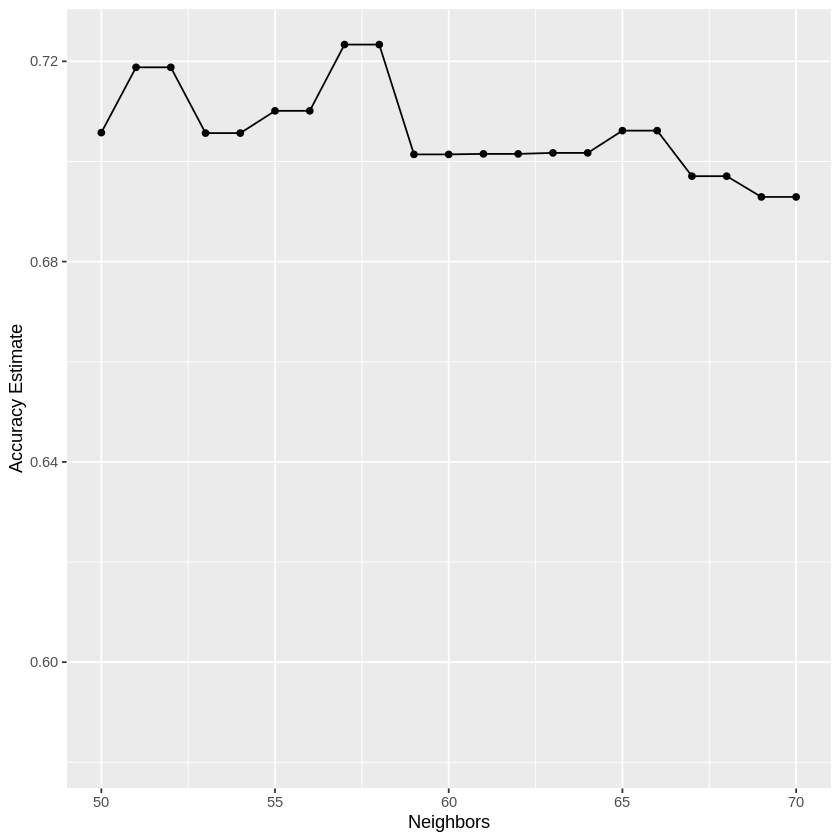

In [25]:
accuracy_vs_k_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                             geom_point() +
                             geom_line() +
                             labs(x = "Neighbors", y = "Accuracy Estimate") +
                            xlim(50,70)
accuracy_vs_k_plot                          